# U.S. Medical Insurance Costs

### Goals and Objectives
1. Age Analysis - calculate an avarage, max, and min age.
2. BMI Analysis - breakdown all the people on the database into five groups: underweight, normal, overweight, obese,and extremely obese.
3. Smoker Analysis - calculate percentage of smokers and non-smokers.
4. Region Analysis - breakdown into regions.


In [16]:
# Importing CSV lib
import csv

# Create empty lists for each column
ages = []
sexes = []
bmis = []
num_children = []
smoker_stat = []
regions = []
charges = []

#Function for loading data 
def load_data (csv_file, lst, column_name):
    with open(csv_file) as csv_info:
        csv_dict = csv.DictReader(csv_info)
        for row in csv_dict:
            lst.append(row[column_name])
    return lst

#Load data from CSV file to lists
load_data('insurance.csv', ages, 'age')
load_data('insurance.csv', sexes, 'sex')
load_data('insurance.csv', bmis, 'bmi')
load_data('insurance.csv', num_children, 'children')
load_data('insurance.csv', smoker_stat, 'smoker')
load_data('insurance.csv', regions, 'region')
load_data('insurance.csv', charges, 'charges')
        

['16884.924',
 '1725.5523',
 '4449.462',
 '21984.47061',
 '3866.8552',
 '3756.6216',
 '8240.5896',
 '7281.5056',
 '6406.4107',
 '28923.13692',
 '2721.3208',
 '27808.7251',
 '1826.843',
 '11090.7178',
 '39611.7577',
 '1837.237',
 '10797.3362',
 '2395.17155',
 '10602.385',
 '36837.467',
 '13228.84695',
 '4149.736',
 '1137.011',
 '37701.8768',
 '6203.90175',
 '14001.1338',
 '14451.83515',
 '12268.63225',
 '2775.19215',
 '38711',
 '35585.576',
 '2198.18985',
 '4687.797',
 '13770.0979',
 '51194.55914',
 '1625.43375',
 '15612.19335',
 '2302.3',
 '39774.2763',
 '48173.361',
 '3046.062',
 '4949.7587',
 '6272.4772',
 '6313.759',
 '6079.6715',
 '20630.28351',
 '3393.35635',
 '3556.9223',
 '12629.8967',
 '38709.176',
 '2211.13075',
 '3579.8287',
 '23568.272',
 '37742.5757',
 '8059.6791',
 '47496.49445',
 '13607.36875',
 '34303.1672',
 '23244.7902',
 '5989.52365',
 '8606.2174',
 '4504.6624',
 '30166.61817',
 '4133.64165',
 '14711.7438',
 '1743.214',
 '14235.072',
 '6389.37785',
 '5920.1041',
 '176

In [17]:
#Age Analysis

def av_age(lst):
    total_age = 0
    for record in lst:
        total_age += int(record)
    av_age = round(total_age/len(lst))
    return av_age

average_age = av_age(ages)
print('Average age: ' + str(average_age))

def max_age(lst):
    max_age = 0
    for record in lst:
        if int(record) >= max_age:
            max_age = int(record)
    return max_age

maximum_age = max_age(ages)
print('Maximum age: ' + str(maximum_age))

def min_age(lst):
    #Assumption based on list scanning
    min_age = 18
    for record in lst:
        if int(record) <= min_age:
            min_age = int(record)
    return min_age

minimum_age = min_age(ages)
print('Minimum age: ' + str(minimum_age))

Average age: 39
Maximum age: 64
Minimum age: 18


{'Underweight': 20, 'Normal': 222, 'Overweight': 377, 'Obese': 388, 'Extremely obese': 331}


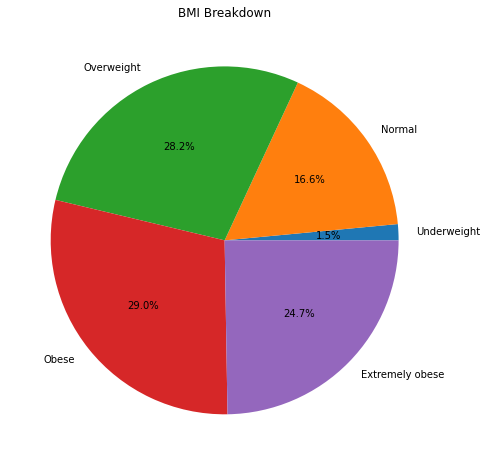

In [18]:
#BMI Analysis

def bmi_dict(lst):
    under = 0
    norm = 0
    over = 0
    obese = 0
    ex_obese = 0
    for record in lst:
        if float(record) < 18.5:
            under += 1
        elif float(record) >= 18.5 and float(record) <= 24.9:
            norm +=1
        elif float(record) >= 25 and float(record) <= 29.9:
            over +=1
        elif float(record) >= 30 and float(record) <= 34.9:
            obese +=1
        else:
            ex_obese += 1
    bmi_dict = {
        'Underweight': under,
        'Normal': norm,
        'Overweight': over,
        'Obese': obese,
        'Extremely obese': ex_obese
    }
    return bmi_dict

bmi_analysis = bmi_dict(bmis)
print(bmi_analysis)

import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 8))
plt.pie(bmi_analysis.values(), labels = bmi_analysis, autopct='%1.1f%%')
plt.title('BMI Breakdown')
plt.show()

In [19]:
#Smoker Analysis

def smokers(lst):
    smoker = 0
    non_smoker = 0
    for record in lst:
        if record == 'yes':
            smoker += 1
        else:
            non_smoker += 1
    smoker_percentage = round(((smoker/len(lst))*100),1)
    non_smoker_percentage = round(((non_smoker/len(lst))*100),1)
    smoker_dict = {
        'Smokers': str(smoker_percentage)+'%',
        'Non Smokers': str(non_smoker_percentage)+'%'
    }
    return smoker_dict

smoker_analysis = smokers(smoker_stat)
print(smoker_analysis)

def sm_non_sm_charges(lst1, lst2):
    smokers = 0
    non_smokers = 0
    smoker_charges = 0
    non_smoker_charges = 0
    for record in lst1:
        if record == 'yes':
            smoker_charges += float(lst2[lst1.index(record)])
            smokers +=1
        else:
            non_smoker_charges += float(lst2[lst1.index(record)])
            non_smokers += 1
    av_smokers = round((smoker_charges / smokers), 2)
    av_non_smokers = round((non_smoker_charges / non_smokers), 2)
    charges_diff = round(((av_non_smokers/(av_smokers - av_non_smokers))*100), 2)
    print('Average smokers charge: ' + str(av_smokers))
    print('Average non-smokers charge: ' + str(av_non_smokers))
    print('Difference between average smokers and non smokers charges: ' + str(charges_diff)+'%')
    return av_smokers, av_non_smokers,charges_diff
    
sm_non_sm_charges(smoker_stat, charges) 
    


{'Smokers': '20.5%', 'Non Smokers': '79.5%'}
Average smokers charge: 16884.92
Average non-smokers charge: 1725.55
Difference between average smokers and non smokers charges: 11.38%


(16884.92, 1725.55, 11.38)

In [20]:
#Region Analysis
def region_dict(lst):
    southwest = 0
    southeast = 0
    northwest = 0
    northeast = 0
    for record in lst:
        if record == 'southwest':
            southwest += 1
        elif record == 'southeast':
            southeast += 1
        elif record == 'northwest':
            northwest += 1
        else:
            northeast += 1
    region_dict = {
        'Southwest': southwest,
        'Southeast': southeast,
        'Northwest': northwest,
        'Northeast': northeast
    }
    return region_dict

region_d = region_dict(regions)
print(region_d)

{'Southwest': 325, 'Southeast': 364, 'Northwest': 325, 'Northeast': 324}
